In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
# optimizer
ga = GA(
    dict(
        m = 200,
        x_rate = [0.3, 0.5],
        m_rate = [0.2, 0.6],
        weight_constraint = [-3.,3.],
        radioactive_rating = [0.1, 0.5],
        grow_factor = [0.1, 0.5]))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 300
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

me in: 312
to refresh 0
Iteration 147/300: 	71.35419464111328
update global 71.35419464111328
update global 71.35407257080078
update global 71.33554077148438
update global 71.31352233886719
came in: 315
to refresh 0
Iteration 148/300: 	71.31352233886719
update global 71.31352233886719
came in: 319
to refresh 1
Iteration 149/300: 	71.31352233886719
update global 71.31352233886719
update global 71.28730773925781
update global 71.25357818603516
came in: 320
to refresh 3
Iteration 150/300: 	71.25357818603516
update global 71.25357818603516
came in: 310
to refresh 1
Iteration 151/300: 	71.25357818603516
update global 71.25357818603516
update global 71.22319793701172
update global 71.2076416015625
came in: 319
to refresh 0
Iteration 152/300: 	71.2076416015625
update global 71.2076416015625
came in: 322
to refresh 2
Iteration 153/300: 	71.2076416015625
update global 71.2076416015625
came in: 322
to refresh 1
Iteration 154/300: 	71.2076416015625
update global 71.2076416015625
update global 71.

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

[84.16822052001953, 84.10707092285156, 84.10707092285156, 77.38607788085938, 77.38607788085938, 77.38607788085938, 77.37130737304688, 77.37130737304688, 77.37130737304688, 77.37130737304688, 77.37130737304688, 77.37130737304688, 77.37130737304688, 77.37130737304688, 77.37130737304688, 77.37130737304688, 77.33052062988281, 77.33052062988281, 77.33052062988281, 77.33052062988281, 77.30968475341797, 77.30249786376953, 77.30249786376953, 77.27871704101562, 75.7022933959961, 75.7022933959961, 75.7022933959961, 75.7022933959961, 75.7022933959961, 75.7022933959961, 75.7022933959961, 75.05656433105469, 75.05656433105469, 75.05656433105469, 75.00084686279297, 75.00084686279297, 75.00084686279297, 74.65965270996094, 74.45921325683594, 74.37088012695312, 74.37088012695312, 74.37088012695312, 74.37088012695312, 74.329833984375, 74.18343353271484, 74.18343353271484, 74.12091827392578, 74.06771850585938, 73.98979187011719, 73.98979187011719, 73.98979187011719, 73.83033752441406, 73.82117462158203, 7

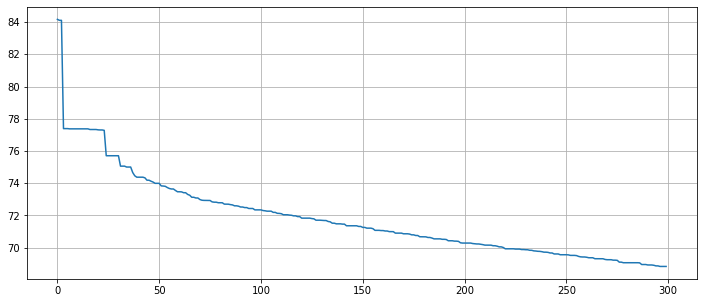

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, True)
print(score)

[0. 1. 0.] <-> [[0.089623  ]
 [0.43917295]
 [0.47120404]]
[1. 0. 0.] <-> [[0.4208429 ]
 [0.32068732]
 [0.2584698 ]]
[1. 0. 0.] <-> [[0.5716559 ]
 [0.21824588]
 [0.21009827]]
[1. 0. 0.] <-> [[0.40670615]
 [0.29902324]
 [0.29427063]]
[1. 0. 0.] <-> [[0.88897055]
 [0.07390752]
 [0.03712191]]
[1. 0. 0.] <-> [[0.9110161 ]
 [0.06487567]
 [0.02410825]]
[1. 0. 0.] <-> [[0.71107006]
 [0.1866876 ]
 [0.1022423 ]]
[0. 0. 1.] <-> [[0.90250385]
 [0.06733508]
 [0.03016111]]
[1. 0. 0.] <-> [[0.8885883 ]
 [0.07408901]
 [0.03732266]]
[1. 0. 0.] <-> [[0.60688585]
 [0.2014488 ]
 [0.19166537]]
[1. 0. 0.] <-> [[0.90504736]
 [0.06608082]
 [0.02887176]]
[1. 0. 0.] <-> [[0.5789845 ]
 [0.25804764]
 [0.1629679 ]]
[1. 0. 0.] <-> [[0.4950934 ]
 [0.298312  ]
 [0.20659451]]
[1. 0. 0.] <-> [[0.91351396]
 [0.06199179]
 [0.02449414]]
[1. 0. 0.] <-> [[0.879311  ]
 [0.07838185]
 [0.04230714]]
[1. 0. 0.] <-> [[0.9029092 ]
 [0.06713529]
 [0.02995552]]
[0. 1. 0.] <-> [[0.03449573]
 [0.44491437]
 [0.52058995]]
[1. 0. 0.] <->